In [1]:
# conda install matplotlib

In [2]:
def preamble():
    print(' ')
    print('Hidden Markov Model')
    print('Patrick Humphries (pvhumphr@usc.edu)')
    print('University of Southern California')
    print('INF 552 Machine Learning for Data Science (32458)')
    print('Programming Assignment 7')
    print('Spring 2020')
    print(' ')
    print('This application finds the robot\'s next location:')
    print('1.  Calculate location using noisy distances (emissions).')
    print('2.  Adjust calculated location until it is contiguous with') 
    print('    previous location while avoiding obsticales (transition template)')
    print(' ')

In [3]:
print(' ')
print('Importing libraries.')
import numpy as np
import math
import matplotlib.pyplot as plt

 
Importing libraries.


In [4]:
def define_cells():
    print(' ')
    print('Defining grid with obstructions and borders.')
    
    # One hundred original cells and 44 additional border cells 
    # are initialized to being free.
    cells = np.ones((10,10), dtype=int)

    # Add obstructions to the cells.
    cells[1][2] = 0
    cells[1][3] = 0
    cells[1][4] = 0
    cells[1][5] = 0
    cells[1][6] = 0
    cells[2][2] = 0
    cells[2][6] = 0
    cells[3][2] = 0
    cells[3][6] = 0
    cells[4][2] = 0
    cells[4][6] = 0
    cells[5][2] = 0
    cells[5][6] = 0
    
    return cells


In [5]:
def define_steps():
    print(' ')
    print('Defining observations (steps).')
    # Define observations (steps).  
    # Each value represents a noisy distance to the relative tower.
    # This is used to find the cell in cells (see below).
    # The first row is a place holder.
    # The first column is a place holder.
    # Placeholders allow for step index to range 1 to 11.
    # Placeholders allow for tower index to range 1 to 4.
    steps = []
    steps.append([6.3, 5.9, 5.5, 6.7])    # Step 1
    steps.append([5.7, 7.2, 4.4, 6.8])    # Step 2
    steps.append([7.6, 9.4, 4.3, 5.4])    # Step 3
    steps.append([9.5, 10.0, 3.7, 6.6])   # Step 4
    steps.append([6.0, 10.7, 2.8, 5.8])   # Step 5
    steps.append([9.3, 10.2, 2.6, 5.4])   # Step 6
    steps.append([8.0, 13.1, 1.9, 9.4])   # Step 7
    steps.append([6.4, 8.2, 3.9, 8.8])    # Step 8
    steps.append([5.0, 10.3, 3.6, 7.2])   # Step 9
    steps.append([3.8, 9.8, 4.4, 8.8])    # Step 10
    steps.append([3.3, 7.6, 4.3, 8.5])    # Step 11

    print(' ')
    print('Steps (Observations)')
    for k in range(0, len(steps)):
        print('Step:', k, 
              '\t Tower 1:', steps[k][TOWER_1],
              '\t Tower 2:', steps[k][TOWER_2],
              '\t Tower 3:', steps[k][TOWER_3],
              '\t Tower 4:', steps[k][TOWER_4])
        
    return steps


In [6]:
def define_transition_template(cells):
    print('Define transition template')
    
    # A transition template is the probability of movement
    # from a previous cell in all eight directions.
    n_rows, n_columns = cells.shape
    transition_template = np.zeros(8)
    
    # Count the valid transitions.
    for i in range(n_rows):
        for j in range(n_columns):
            transition_template[N] += cells[i][j] * cells[i - 1][j]
            transition_template[NE] += cells[i][j] * cells[i - 1][j + 1]
            transition_template[E] += cells[i][j] * cells[i][j + 1]
            transition_template[SE] += cells[i][j] * cells[i + 1][j + 1]
            transition_template[S] += cells[i][j] * cells[i + 1][j]
            transition_template[SW] += cells[i][j] * cells[i + 1][j - 1]
            transition_template[W] += cells[i][j] * cells[i][j - 1]
            transition_template[NW] += cells[i][j] * cells[i + 1][j - 1]
    
    # Convert counts to probabilities.
    transition_template = transition_template / 100
    
    print(' ')
    print('Transition Template')
    print('N:\t{:.2f}'.format(transition_template[N]))
    print('NE:\t{:.2f}'.format(transition_template[NE]))
    print('E:\t{:.2f}'.format(transition_template[E]))
    print('SE:\t{:.2f}'.format(transition_template[SE]))
    print('S:\t{:.2f}'.format(transition_template[S]))
    print('SW:\t{:.2f}'.format(transition_template[SW]))
    print('W:\t{:.2f}'.format(transition_template[W]))
    print('NW:\t{:.2f}'.format(transition_template[NW]))
    
    return transition_template

In [7]:
def run_viterbi_algorithm(steps, cells):
    print(' ')
    print('Run the Viterbi Algorithm')
    
    # Define the collection of robot coordinates.
    locations = np.zeros(33)
    locations = locations.astype(int)
    locations.resize(len(steps), 3)
    
    # Process each observation (step).
    for k in range(0,len(steps)):
        print(' ')
        print('Step', str(k + 1))
        
        # Determine state and location based on emissions (distances).
        locations = get_locations(k, steps, cells, locations)
        
        # Visualize the cells, obstructions, robot location, state, and next move.
        plot_cells(cells, locations)
        
    return locations

In [8]:
def plot_cells(cells, locations):
    print('Plot Cells')
    
    plot_cells = cells.copy()
    plot_cells = plot_cells.astype(np.str)
    n_rows, n_columns = plot_cells.shape

    rows = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')
    cols = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')
    colors = np.full((n_rows, n_columns), 'w', dtype='object')
    
    # Add obstructions.
    for i in range(n_rows):
        for j in range(n_columns):
            if plot_cells[i][j] == '0':
                colors[i][j] = 'r'
                
    # Add robot.
    if locations is not None:
        for k in range(len(locations)):
            if locations[k][2] == 0:
                continue
            plot_cells[locations[k][0], locations[k][1]] = 'step ' + str(k + 1)
            colors[locations[k][0], locations[k][1]] = 'b'
    
    fig, ax = plt.subplots()
    ax.axis('off')
    
    table = ax.table(cellText=plot_cells, rowLabels=rows, colLabels=cols, 
             cellColours=colors, loc='center', cellLoc='center')
    
    for i in range(n_rows):
        for j in range(n_columns):
            cell_text = table[(i, j)].get_text()
            if cell_text.get_text().startswith('step'):
                cell_text.set_color('w')
        
    fig.tight_layout()

    plt.show()
    

In [9]:
def get_locations(k, steps, cells, locations):

    print('Getting robot location based on emissions (distances).')
    
    # Calculate the curent location (emission) of the robot.
    i = int((100 + steps[k][TOWER_1]**2 - steps[k][TOWER_4]**2)/20)
    j = int((100 + steps[k][TOWER_1]**2 - steps[k][TOWER_2]**2)/20)
    
    # Use the low-end calculated number.
    if k == 7:
        i = 1
        j = 2
    
    print('Calculated i:', i, 'j:', j)
    
    # Keep the robot within the borders.
    if i < 0: i = 0
    if i > 9: i = 9
    if j < 0: j = 0
    if j > 9: j = 9
        
    # From the requirements.
    # The initial position of the robot has a uniform prior over all free cells.
    if k == 0:
        if i == 0: 
            i += 1  # At the North border, move South.
        elif i == 9: 
            i -= 1  # At South border, move North.
        elif j == 0: 
            j += 1  # At West border, move East
        elif j == 9: 
            j -= 1  # At East border, move West.
        elif cells[i + 1][j] == 0: 
            i -= 1    # South is blocked, move North
            print('Next to obstruction, moved North.')
        elif cells[i - 1][j] == 0: 
            i += 1    # North is blocked, move South.
            print('Next to obstruction, moved South.')
#         elif cells[i - 1][j + 1] == 0:
#             i += 1; j -= 1  # Northwest is blocked, move Southwest.
#             print('Moved Southwest.')
        elif cells[i][j + 1] == 0:
            j -= 1  # East is blocked, move West.
            print('Next to obstruction, moved West.')
#         elif cells[i + 1][j + 1] == 0:
#             i -= 1; j -= 1  # Southeast is blocked, move Northwest.
#             print('Moved Northwest.')
        elif cells[i][j - 1] == 0:
            j += 1  # West is blocked, move East.
            'Next to obstruction, moved East.'
#         elif cells[i - 1][j - 1] == 0:
#             i += 1; j += 1  # Northwest is blocked, move Southeast.
#             'Moved Southeast.'
        location = (int(i), int(j), 1)
        locations[k] = location
        return locations

    # Find the difference between calculated and prior locations.
    previous_location = locations[k - 1]
    previous_i = previous_location[0]
    previous_j = previous_location[1]
    
    # Calculated location on top of previous location.
    # Move it off.
    if i == previous_i and j == previous_j:
        print('Calculated location on top of previous location.')
        if cells[i][j -1 ] == 1:
            j -= 1
            print('Move West.')
        elif cells[i][j + 1] == 1:
            j += 1
            print('Move East.')
        elif cells[i - 1][j] == 1:
            i -= 1
            print('Move North.')
        else:
            i += 1
            print('Move South.')
            
    # Adjust location until it becomes contiguous with the prior location.
    debug_counter = 0
    while True:
        debug_counter += 1
        if debug_counter > 100:
            print('Bad while loop.')
            break
            
        # Calculated location on top of previous location.
        # Move it off.
        if i == previous_i and j == previous_j:
            print('Calculated location on top of previous location.')
            if cells[i][j -1 ] == 1:
                j -= 1
                print('Move West.')
            elif cells[i][j + 1] == 1:
                j += 1
                print('Move East.')
            elif cells[i - 1][j] == 1:
                i -= 1
                print('Move North.')
            else:
                i += 1
                print('Move South.')
            
        # Stop when the current and prior locations are contiguous.
        i_difference = abs(i - previous_i)
        j_difference = abs(j - previous_j)
        
        # Contiguous East-West.
        if i_difference == 0 and j_difference == 1:
            break
            
        # Contiguous North-South.
        if j_difference == 0 and i_difference == 1:
            break
            
        # Contiguous Northwest-Southeast or Northeast-Southwest.
#         if i_difference == 1 and j_difference == 1:
#             break
            
#         print(' ')
#         print('i_difference:', i_difference, 'j_difference:', j_difference)
        
        # Current location is South of prior location.
        if i_difference >= 1:
            # Move location North.
            if i > previous_i:   
                print('South of previous.')
                # If North is blocked, move either East or West and try again.
                if cells[i - 1][j] == 0:
                    if j < 5:
                        j -= 1
                        print('Blocked, moved West.')
                    else:
                        j += 1
                        print('Blocked, moved East.')
                    continue
                else:
                    i -= 1
                    print('Moved North.')
            # Current location is North of prior location.
            elif i < previous_i:  
                print('North of previous.')
                # If South is blocked, move either East or West and try again.
                if cells[i + 1][j] == 0:
                    if j < 5:
                        j -= 1
                        print('Blocked, moved West.')
                    else:
                        j += 1
                        print('Blocked, moved East.')
                    continue
                else:
                    i += 1
                    print('Moved South.')
#             continue
            
            # Stop when the current and prior locations are contiguous.
        i_difference = abs(i - previous_i)
        j_difference = abs(j - previous_j)
        
        # Contiguous East-West.
        if i_difference == 0 and j_difference == 1:
            break
            
        # Contiguous North-South.
        if j_difference == 0 and i_difference == 1:
            break

        # Current location is East of prior location.
        if j_difference >= 1:
            # Move location West
            if j > previous_j:   
                print('East of previous.')
                # If West is blocked, move either South and try again.
                if cells[i][j - 1] == 0:
                    i += 1
                    print('Blocked, moved South.')
                    continue
                else:
                    j -= 1
                    print('Moved West.')
            # Current location is West of prior location.
            elif j < previous_j:   
                print('West of previous.')
                # If East is blocked, move either North or South and try again.
                if cells[i][j + 1] == 0:
                    i += 1
                    print('Blocked, moved South.')
                    continue
                else:
                    j += 1
                    print('Moved East.')
#             continue
        
    location = (int(i), int(j), 1)
    locations[k] = location 
    
    return locations


 
Hidden Markov Model
Patrick Humphries (pvhumphr@usc.edu)
University of Southern California
INF 552 Machine Learning for Data Science (32458)
Programming Assignment 7
Spring 2020
 
This application finds the robot's next location:
1.  Calculate location using noisy distances (emissions).
2.  Adjust calculated location until it is contiguous with
    previous location while avoiding obsticales (transition template)
 
 
Defining grid with obstructions and borders.
Plot Cells


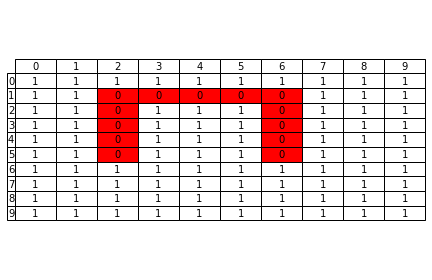

 
Defining observations (steps).
 
Steps (Observations)
Step: 0 	 Tower 1: 6.3 	 Tower 2: 5.9 	 Tower 3: 5.5 	 Tower 4: 6.7
Step: 1 	 Tower 1: 5.7 	 Tower 2: 7.2 	 Tower 3: 4.4 	 Tower 4: 6.8
Step: 2 	 Tower 1: 7.6 	 Tower 2: 9.4 	 Tower 3: 4.3 	 Tower 4: 5.4
Step: 3 	 Tower 1: 9.5 	 Tower 2: 10.0 	 Tower 3: 3.7 	 Tower 4: 6.6
Step: 4 	 Tower 1: 6.0 	 Tower 2: 10.7 	 Tower 3: 2.8 	 Tower 4: 5.8
Step: 5 	 Tower 1: 9.3 	 Tower 2: 10.2 	 Tower 3: 2.6 	 Tower 4: 5.4
Step: 6 	 Tower 1: 8.0 	 Tower 2: 13.1 	 Tower 3: 1.9 	 Tower 4: 9.4
Step: 7 	 Tower 1: 6.4 	 Tower 2: 8.2 	 Tower 3: 3.9 	 Tower 4: 8.8
Step: 8 	 Tower 1: 5.0 	 Tower 2: 10.3 	 Tower 3: 3.6 	 Tower 4: 7.2
Step: 9 	 Tower 1: 3.8 	 Tower 2: 9.8 	 Tower 3: 4.4 	 Tower 4: 8.8
Step: 10 	 Tower 1: 3.3 	 Tower 2: 7.6 	 Tower 3: 4.3 	 Tower 4: 8.5
 
Run the Viterbi Algorithm
 
Step 1
Getting robot location based on emissions (distances).
Calculated i: 4 j: 5
Next to obstruction, moved West.
Plot Cells


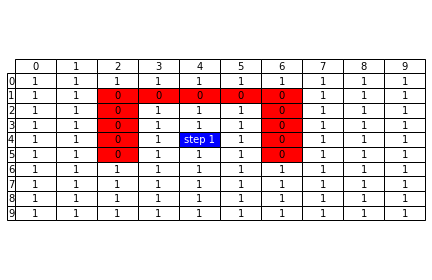

 
Step 2
Getting robot location based on emissions (distances).
Calculated i: 4 j: 4
Calculated location on top of previous location.
Move West.
Plot Cells


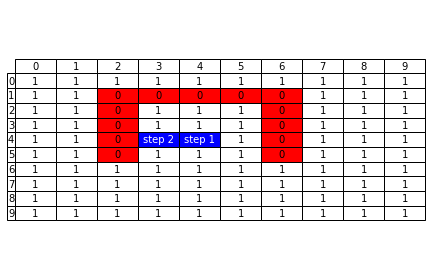

 
Step 3
Getting robot location based on emissions (distances).
Calculated i: 6 j: 3
South of previous.
Moved North.
Plot Cells


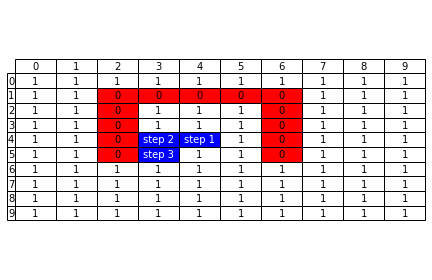

 
Step 4
Getting robot location based on emissions (distances).
Calculated i: 7 j: 4
South of previous.
Moved North.
East of previous.
Moved West.
Plot Cells


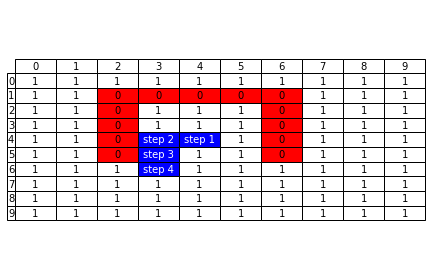

 
Step 5
Getting robot location based on emissions (distances).
Calculated i: 5 j: 1
North of previous.
Moved South.
West of previous.
Moved East.
Plot Cells


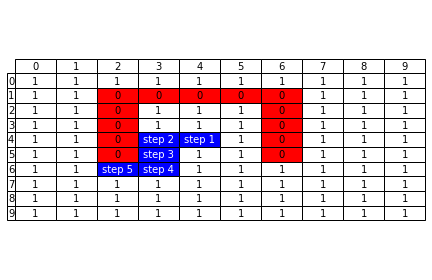

 
Step 6
Getting robot location based on emissions (distances).
Calculated i: 7 j: 4
South of previous.
Moved North.
East of previous.
Moved West.
Plot Cells


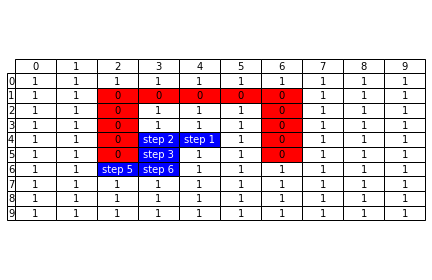

 
Step 7
Getting robot location based on emissions (distances).
Calculated i: 3 j: 0
North of previous.
Moved South.
West of previous.
Moved East.
North of previous.
Moved South.
West of previous.
Blocked, moved South.
West of previous.
Moved East.
Plot Cells


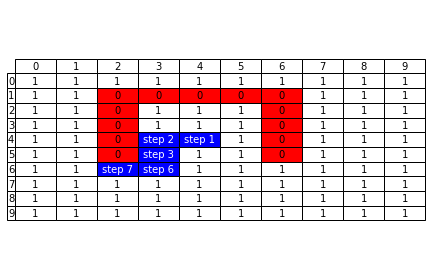

 
Step 8
Getting robot location based on emissions (distances).
Calculated i: 1 j: 2
North of previous.
Blocked, moved West.
North of previous.
Moved South.
West of previous.
Blocked, moved South.
North of previous.
Moved South.
West of previous.
Blocked, moved South.
North of previous.
Moved South.
Plot Cells


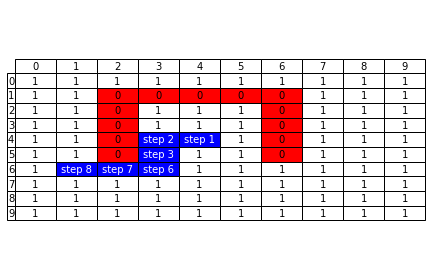

 
Step 9
Getting robot location based on emissions (distances).
Calculated i: 3 j: 0
North of previous.
Moved South.
West of previous.
Moved East.
North of previous.
Moved South.
Plot Cells


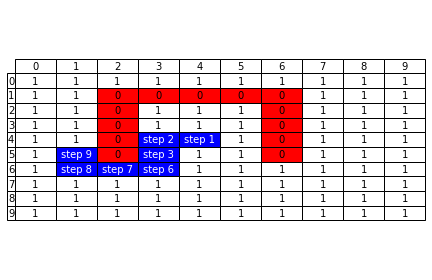

 
Step 10
Getting robot location based on emissions (distances).
Calculated i: 1 j: 0
North of previous.
Moved South.
West of previous.
Moved East.
North of previous.
Moved South.
North of previous.
Moved South.
Plot Cells


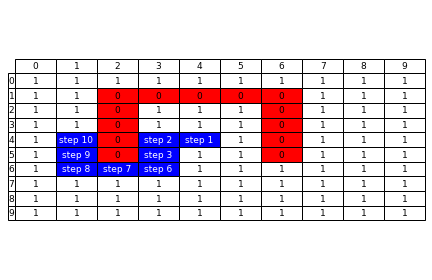

 
Step 11
Getting robot location based on emissions (distances).
Calculated i: 1 j: 2
North of previous.
Blocked, moved West.
North of previous.
Moved South.
North of previous.
Moved South.
Plot Cells


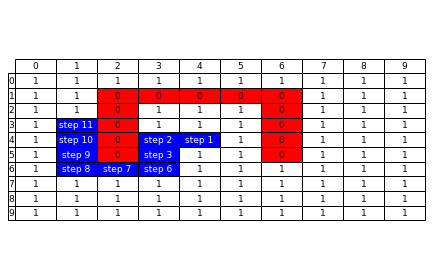

 
Robot Locations
step: 0 i: 4 j: 4
step: 1 i: 4 j: 3
step: 2 i: 5 j: 3
step: 3 i: 6 j: 3
step: 4 i: 6 j: 2
step: 5 i: 6 j: 3
step: 6 i: 6 j: 2
step: 7 i: 6 j: 1
step: 8 i: 5 j: 1
step: 9 i: 4 j: 1
step: 10 i: 3 j: 1
 
Done!


In [10]:
# Main

preamble()

# The directions of a compass will be used as the direction dimension.
N = 0; NE = 1; E = 2; SE = 3; S = 4; SW = 5; W = 6; NW = 7

# Define tower identifiers.
TOWER_1 = 0; TOWER_2 = 1; TOWER_3 = 2; TOWER_4 = 3

# Define cells.
cells = define_cells()
plot_cells(cells, None)

# Define observations (steps).
steps = define_steps()

# Calculate robot moves using Viterbi Algorithm.
locations = run_viterbi_algorithm(steps, cells)

print(' ')
print('Robot Locations')
for i in range(len(locations)):
    print('step:', i, 'i:', locations[i][0], 'j:', locations[i][1])
    
print(' ')
print('Done!')